**Лабораторная работа №6: Градиентный бустинг**

**Выполнила: Мишагина Валерия 6133**



Датасет -  [Predict Restaurant Customer Satisfaction Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset?resource=download)

**№1.** Считать в `pandas.DataFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [67]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
import shap
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [6]:
data = pd.read_csv('restaurant_customer_satisfaction.csv')

Features
**Demographic Information**

* CustomerID: Unique identifier for each customer.
* Age: Age of the customer.
* Gender: Gender of the customer (Male/Female).
* Income: Annual income of the customer in USD.

**Visit-specific Variables**

* VisitFrequency: How often the customer visits the restaurant (Daily, Weekly, Monthly, Rarely).
* AverageSpend: Average amount spent by the customer per visit in USD.
* PreferredCuisine: The type of cuisine preferred by the customer (Italian, Chinese, Indian, Mexican, American).
* TimeOfVisit: The time of day the customer usually visits (Breakfast, Lunch, Dinner).
* GroupSize: Number of people in the customer's group during the visit.
* DiningOccasion: The occasion for dining (Casual, Business, Celebration).
* MealType: Type of meal (Dine-in, Takeaway).
* OnlineReservation: Whether the customer made an online reservation (0: No, 1: Yes).
* DeliveryOrder: Whether the customer ordered delivery (0: No, 1: Yes).
* LoyaltyProgramMember: Whether the customer is a member of the restaurant's loyalty program (0: No, 1: Yes).
* WaitTime: Average wait time for the customer in minutes.

**Satisfaction Ratings**

* ServiceRating: Customer's rating of the service (1 to 5).
* FoodRating: Customer's rating of the food (1 to 5).
* AmbianceRating: Customer's rating of the restaurant ambiance (1 to 5).

**Target Variable**

* HighSatisfaction: Binary variable indicating whether the customer is highly satisfied (1) or not (0).

# Датасет и подготовка данных

**№2.1** Привести описание датасета.

In [25]:
# информация о данных в DataFrame, тип данных признаков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [26]:
data.shape

(1500, 19)

In [27]:
data.head()

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


**№2.2** Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные"




In [7]:
data.isna().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

In [7]:
data.drop('CustomerID', axis=1, inplace=True)

In [29]:
data.head()

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


**№2.3** Нормализовать численные данные

In [8]:
scaler_cols = ['Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

In [9]:
scaler = StandardScaler()
scaler.fit(data[scaler_cols])
data[scaler_cols] = scaler.transform(data[scaler_cols])
data = pd.DataFrame(data, columns=data.columns)
data.head()

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,-0.590289,Male,-0.066593,Weekly,-1.486313,Chinese,Breakfast,-0.795670,Business,Takeaway,0,1,1,0.776385,-0.733697,1.411872,0.698279,0
1,-1.659653,Male,-1.108162,Rarely,0.186188,American,Dinner,-1.577528,Casual,Dine-in,0,0,0,1.589960,1.374628,1.411872,0.008734,0
2,-0.189277,Female,-0.057241,Weekly,0.019761,American,Dinner,0.377116,Celebration,Dine-in,0,1,0,1.076162,-0.030922,0.706876,1.387824,0
3,-0.055607,Male,0.284150,Rarely,-1.186885,Indian,Lunch,-1.577528,Celebration,Dine-in,0,0,0,-1.313922,0.671853,1.411872,-1.370355,0
4,0.746416,Female,-0.471175,Monthly,0.810200,Chinese,Breakfast,-1.577528,Business,Takeaway,0,0,1,0.443125,-0.733697,0.001880,1.387824,0


**№2.4** Разбить выборку на обучающую и тестовую.

> Из датафреймов обучающей и тестовой выборки необходимо сформировать два набора обучающей и тестовой выборок: с закодированными категориальными признаками и с категориальными признаками без обработки.



In [10]:
data_code = data.copy()

Раскодируем признаки, закодированные в датасете

In [11]:
data.replace({'OnlineReservation': {0: 'No', 1: 'Yes'}}, inplace = True)
data.replace({'DeliveryOrder': {0: 'No', 1: 'Yes'}}, inplace = True)
data.replace({'LoyaltyProgramMember': {0: 'No', 1: 'Yes'}}, inplace = True)
data.replace({'HighSatisfaction': {0: 'No', 1: 'Yes'}}, inplace = True)

In [35]:
data.head() # набор данных с категориальными признаками "как есть"

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,-0.590289,Male,-0.066593,Weekly,-1.486313,Chinese,Breakfast,-0.795670,Business,Takeaway,No,Yes,Yes,0.776385,-0.733697,1.411872,0.698279,No
1,-1.659653,Male,-1.108162,Rarely,0.186188,American,Dinner,-1.577528,Casual,Dine-in,No,No,No,1.589960,1.374628,1.411872,0.008734,No
2,-0.189277,Female,-0.057241,Weekly,0.019761,American,Dinner,0.377116,Celebration,Dine-in,No,Yes,No,1.076162,-0.030922,0.706876,1.387824,No
3,-0.055607,Male,0.284150,Rarely,-1.186885,Indian,Lunch,-1.577528,Celebration,Dine-in,No,No,No,-1.313922,0.671853,1.411872,-1.370355,No
4,0.746416,Female,-0.471175,Monthly,0.810200,Chinese,Breakfast,-1.577528,Business,Takeaway,No,No,Yes,0.443125,-0.733697,0.001880,1.387824,No


Закодируем категориальные признаки

In [12]:
category_cols = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType']
dicts = []
for col in category_cols:
  keys, values = pd.factorize(data[col].unique())
  d = dict(zip(values, keys))
  dicts.append(d)
  data_code[col] = data_code[col].replace(d)

In [13]:
data_code.head() # набор данных с закодированными категориальными признаками

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,-0.590289,0,-0.066593,0,-1.486313,0,0,-0.795670,0,0,0,1,1,0.776385,-0.733697,1.411872,0.698279,0
1,-1.659653,0,-1.108162,1,0.186188,1,1,-1.577528,1,1,0,0,0,1.589960,1.374628,1.411872,0.008734,0
2,-0.189277,1,-0.057241,0,0.019761,1,1,0.377116,2,1,0,1,0,1.076162,-0.030922,0.706876,1.387824,0
3,-0.055607,0,0.284150,1,-1.186885,2,2,-1.577528,2,1,0,0,0,-1.313922,0.671853,1.411872,-1.370355,0
4,0.746416,1,-0.471175,2,0.810200,0,0,-1.577528,0,0,0,0,1,0.443125,-0.733697,0.001880,1.387824,0


Будем предсказывать `HighSatisfaction`

In [14]:
x = data.drop('HighSatisfaction', axis=1)
y = data['HighSatisfaction']

x_coded = data_code.drop('HighSatisfaction', axis=1)
y_coded = data_code['HighSatisfaction']

In [15]:
cols = x.columns

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

x_train_coded = x_coded.loc[x_train.index]
x_test_coded = x_coded.loc[x_test.index]
y_train_coded = y_coded.loc[y_train.index]
y_test_coded = y_coded.loc[y_test.index]

In [41]:
# размерности выборок
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1125, 17)
y_train shape: (1125,)
X_test shape: (375, 17)
y_test shape: (375,)


In [42]:
print(f"X_train_coded shape: {x_train_coded.shape}")
print(f"y_train_coded shape: {y_train_coded.shape}")
print(f"X_test_coded shape: {x_test_coded.shape}")
print(f"y_test_coded shape: {y_test_coded.shape}")

X_train_coded shape: (1125, 17)
y_train_coded shape: (1125,)
X_test_coded shape: (375, 17)
y_test_coded shape: (375,)


In [43]:
x_train_coded.head()

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating
1321,0.545910,0,0.823941,0,0.899757,3,2,0.377116,0,1,1,1,1,-1.605145,-1.436472,-0.703116,0.698279
728,1.347933,1,-0.945679,3,0.253300,2,0,-0.404742,0,1,0,1,0,0.497861,-0.030922,1.411872,1.387824
48,-1.058135,1,1.355690,0,-1.039273,2,1,1.158974,2,0,0,0,0,1.607556,-0.733697,-0.703116,-0.680811
775,0.412240,0,-1.656965,2,-1.678581,4,1,-1.577528,2,1,0,1,1,1.191580,1.374628,-0.703116,0.008734
1149,-1.659653,0,0.221772,2,-0.426877,4,0,0.768045,2,0,0,0,0,0.028482,1.374628,-1.408112,0.698279


In [44]:
x_train.head()

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating
1321,0.545910,Male,0.823941,Weekly,0.899757,Mexican,Lunch,0.377116,Business,Dine-in,Yes,Yes,Yes,-1.605145,-1.436472,-0.703116,0.698279
728,1.347933,Female,-0.945679,Daily,0.253300,Indian,Breakfast,-0.404742,Business,Dine-in,No,Yes,No,0.497861,-0.030922,1.411872,1.387824
48,-1.058135,Female,1.355690,Weekly,-1.039273,Indian,Dinner,1.158974,Celebration,Takeaway,No,No,No,1.607556,-0.733697,-0.703116,-0.680811
775,0.412240,Male,-1.656965,Monthly,-1.678581,Italian,Dinner,-1.577528,Celebration,Dine-in,No,Yes,Yes,1.191580,1.374628,-0.703116,0.008734
1149,-1.659653,Male,0.221772,Monthly,-0.426877,Italian,Breakfast,0.768045,Celebration,Takeaway,No,No,No,0.028482,1.374628,-1.408112,0.698279


# Классификаторы

**3.1** Для каждого из классификаторов `AdaBoost`, `GradientBoostingClassifier`, `XGBoost`, `CatBoost` с использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели, использовать выборки с закодированными категориальными признаками.

> Как минимум основных: `n_estimators/iterations`, `learning_rate`, `depth`, параметры регуляризации *L1*, *L2*. Для ускорения вычислений можно сразу с заданным значением `early_stopping_rounds` – тогда понадобится еще выделить валидационный датасет (`XGBoost`) или задать значение `train_size` у `CatBoost` (часть обучающей выборки пойдет в валидационный набор).



In [45]:
#AdaBoost
ada_boost_grid = {
    'n_estimators': range(10, 100, 10),
    'learning_rate': np.arange(0.1, 1, 0.1),
}
ada_model = AdaBoostClassifier(algorithm="SAMME")
ada_search = GridSearchCV(ada_model, ada_boost_grid, cv=3)
ada_search.fit(x_train_coded, y_train_coded)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(10, 100, 10)})

In [136]:
#GradientBoostingClassifier
gradient_grid = {
    'n_estimators': range(10, 300, 50),
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': [5, 7, 9],
}
gradient_model = GradientBoostingClassifier()
gradient_search = GridSearchCV(gradient_model, gradient_grid, cv = 3)
gradient_search.fit(x_train_coded, y_train_coded)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [5, 7, 9],
                         'n_estimators': range(10, 300, 50)})

In [137]:
#XGBoost
xg_grid = {
    'n_estimators': range(10, 300, 50),
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': [5, 7, 9],
    'alpha': [0.1, 0.2, 0.3],
    'lambda': [0.1, 0.2, 0.3]
}
xg_model = XGBClassifier()
xg_search = GridSearchCV(xg_model, xg_grid, cv=3)
xg_search.fit(x_train_coded, y_train_coded)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'alpha': [0.1, 0.2, 0.3], 'lambda': [0.1, 0.2, 0.3],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [5, 7, 9],
                         'n_estimators': range(10, 300, 50)})

In [138]:
#CatBoost
catboost_grid = {
    'n_estimators': range(10, 300, 50),
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': [5, 7, 9],
    'l2_leaf_reg': [0.1, 0.2, 0.3]
}
catboost_model = CatBoostClassifier()
catboost_search = GridSearchCV(catboost_model, catboost_grid, cv=3)
catboost_search.fit(x_train_coded, y_train_coded)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 0.3816607	total: 2.3ms	remaining: 20.7ms
1:	learn: 0.2824243	total: 4.79ms	remaining: 19.2ms
2:	learn: 0.2080220	total: 7.55ms	remaining: 17.6ms
3:	learn: 0.1804039	total: 10.1ms	remaining: 15.1ms
4:	learn: 0.1443240	total: 13ms	remaining: 13ms
5:	learn: 0.1100872	total: 17.3ms	remaining: 11.5ms
6:	learn: 0.0995389	total: 20.5ms	remaining: 8.78ms
7:	learn: 0.0862869	total: 23.1ms	remaining: 5.78ms
8:	learn: 0.0704201	total: 26.6ms	remaining: 2.96ms
9:	learn: 0.0615459	total: 29.5ms	remaining: 0us
0:	learn: 0.3931443	total: 4.6ms	remaining: 271ms
1:	learn: 0.2874736	total: 7.51ms	remaining: 218ms
2:	learn: 0.2018891	total: 10ms	remaining: 190ms
3:	learn: 0.1777165	total: 12.4ms	remaining: 174ms
4:	learn: 0.1336572	total: 14.8ms	remaining: 163ms
5:	learn: 0.1038753	total: 17.5ms	remaining: 157ms
6:	learn: 0.0892746	total: 20ms	remaining: 152ms
7:	learn: 0.0737140	total: 22.5ms	remaining: 146ms
8:	learn: 0.06448

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7b8e82bcd0f0>,
             param_grid={'l2_leaf_reg': [0.1, 0.2, 0.3],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': [5, 7, 9],
                         'n_estimators': range(10, 300, 50)})

In [139]:
#best params
print(f"AdaBoost best params: {ada_search.best_params_}")
print(f"GradientBoostingClassifier best params: {gradient_search.best_params_}")
print(f"XGBoost best params: {xg_search.best_params_}")
print(f"CatBoost best params: {catboost_search.best_params_}")

AdaBoost best params: {'learning_rate': 0.8, 'n_estimators': 60}
GradientBoostingClassifier best params: {'learning_rate': 0.9, 'max_depth': 5, 'n_estimators': 60}
XGBoost best params: {'alpha': 0.1, 'lambda': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 260}
CatBoost best params: {'l2_leaf_reg': 0.3, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 160}


**3.2** Обучить модели `XGBoost`, `CatBoos` с найденными гиперпараметрами на обучающей выборке с категориальными признаками "как есть"

In [140]:
categorical_cols = [var for var in x_train.columns if x_train[var].dtype == 'object']
categorical_cols

['Gender',
 'VisitFrequency',
 'PreferredCuisine',
 'TimeOfVisit',
 'DiningOccasion',
 'MealType',
 'OnlineReservation',
 'DeliveryOrder',
 'LoyaltyProgramMember']

In [141]:
x_train_new = x_train.copy(deep=True)
x_test_new = x_test.copy(deep=True)

for col in categorical_cols:
    x_train_new[col] = pd.Categorical(x_train_new[col])
    x_test_new[col] = pd.Categorical(x_test_new[col])

xgb_best = XGBClassifier(alpha = 0.1, reg_lambda = 0.2, learning_rate = 0.2, max_depth = 7, n_estimators = 260, enable_categorical = True)
xgb_best.fit(x_train_new, y_train_coded)

x_train_cat = Pool(data=x_train_new, label=y_train, cat_features=categorical_cols)
x_test_cat = Pool(data=x_test_new, label=y_test, cat_features=categorical_cols)

catboost_best = CatBoostClassifier(l2_leaf_reg=0.3, learning_rate= 0.4, max_depth= 5, n_estimators= 160)
catboost_best.fit(x_train_cat)

0:	learn: 0.5077961	total: 2.2ms	remaining: 350ms
1:	learn: 0.4192035	total: 4.64ms	remaining: 367ms
2:	learn: 0.3697779	total: 6.69ms	remaining: 350ms
3:	learn: 0.3359696	total: 8.6ms	remaining: 335ms
4:	learn: 0.3038276	total: 10.6ms	remaining: 328ms
5:	learn: 0.2832236	total: 12.8ms	remaining: 330ms
6:	learn: 0.2626591	total: 14.8ms	remaining: 324ms
7:	learn: 0.2476030	total: 16.7ms	remaining: 317ms
8:	learn: 0.2329548	total: 18.6ms	remaining: 312ms
9:	learn: 0.2220067	total: 20.5ms	remaining: 308ms
10:	learn: 0.2137221	total: 22.5ms	remaining: 305ms
11:	learn: 0.2025222	total: 24.4ms	remaining: 301ms
12:	learn: 0.1936946	total: 26.2ms	remaining: 296ms
13:	learn: 0.1911705	total: 28.2ms	remaining: 294ms
14:	learn: 0.1864449	total: 30.2ms	remaining: 292ms
15:	learn: 0.1818523	total: 31.9ms	remaining: 287ms
16:	learn: 0.1736732	total: 33.9ms	remaining: 285ms
17:	learn: 0.1687206	total: 35.9ms	remaining: 283ms
18:	learn: 0.1629297	total: 37.8ms	remaining: 281ms
19:	learn: 0.1609433	tot

**3.3** Итого получить 6 обученных моделей

In [142]:
ada_best_coded = ada_search.best_estimator_
gradient_best_coded = gradient_search.best_estimator_
xgb_best_coded = xg_search.best_estimator_
catboost_best_coded = catboost_search.best_estimator_
xgb_best
catboost_best

**3.4** Вывести метрики на тестовом наборе (как минимум `classification_report`, другие по желанию)

In [143]:
print("AdaBoost (coded)")
preds = ada_best_coded.predict(x_test_coded)
class_rep = classification_report(y_test_coded, preds, digits=7)
print(class_rep)

print("\nGradientBoosting (coded)")
preds = gradient_best_coded.predict(x_test_coded)
class_rep = classification_report(y_test_coded, preds, digits=7)
print(class_rep)

print("\nXGBoost (coded)")
preds = xgb_best_coded.predict(x_test_coded)
class_rep = classification_report(y_test_coded, preds, digits=7)
print(class_rep)

print("\nXGBoost")
preds = xgb_best.predict(x_test_new)
class_rep = classification_report(y_test_coded, preds, digits=7)
print(class_rep)

print("\nCatBoost (coded)")
preds = catboost_best_coded.predict(x_test_coded)
class_rep = classification_report(y_test_coded, preds, digits=7)
print(class_rep)

print("\nCatBoost")
preds = catboost_best.predict(x_test_cat)
class_rep = classification_report(y_test, preds, digits=7)
print(class_rep)

AdaBoost (coded)
              precision    recall  f1-score   support

           0  0.8777778 0.9875000 0.9294118       320
           1  0.7333333 0.2000000 0.3142857        55

    accuracy                      0.8720000       375
   macro avg  0.8055556 0.5937500 0.6218487       375
weighted avg  0.8565926 0.8720000 0.8391933       375


GradientBoosting (coded)
              precision    recall  f1-score   support

           0  0.8831909 0.9687500 0.9239940       320
           1  0.5833333 0.2545455 0.3544304        55

    accuracy                      0.8640000       375
   macro avg  0.7332621 0.6116477 0.6392122       375
weighted avg  0.8392118 0.8640000 0.8404580       375


XGBoost (coded)
              precision    recall  f1-score   support

           0  0.8962536 0.9718750 0.9325337       320
           1  0.6785714 0.3454545 0.4578313        55

    accuracy                      0.8800000       375
   macro avg  0.7874125 0.6586648 0.6951825       375
weighted avg  

**3.5** Сравнить модели, выбрать лучшую

Для CatBoostClassifier и XGBoostClassifier кодирование категориальных признаков не оказалось полезным, на наборе данных с категориальными признаками "как есть" были получены результаты лучше. Лучшая модель (по всем метрикам) - CatBoostClassifier с категориальными признаками "как есть" (accurancy = 0.896)

# Важность признаков

**4.1** С использованием `shap.TreeExplainer` получить
SHAP-значения для лучшей модели

In [145]:
tree_explainer = shap.TreeExplainer(catboost_best)
shap_values = tree_explainer.shap_values(x_train_cat)
shap_values

array([[ 0.17275791,  0.10021767,  0.75997811, ..., -0.63928542,
        -0.66701078,  1.22462179],
       [ 0.9221039 ,  0.01180111, -1.06350859, ..., -0.27139417,
         0.72782008,  0.92523275],
       [-0.05712569, -0.00959388,  0.3618859 , ..., -0.28297187,
        -0.28283695, -0.36977429],
       ...,
       [-0.40214092, -0.00593877, -0.53777577, ...,  0.02290383,
         0.49571172,  0.02106594],
       [ 0.14655535, -0.14014265,  0.0688173 , ..., -0.22379053,
        -0.57177588, -0.70585165],
       [ 0.16175031,  0.13700196, -0.13035473, ...,  0.77512162,
         1.22852086, -0.51215555]])

**4.2** Построить график `shap.plots.force` для одного объекта выборки и для среза произвольного размера

In [146]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0,:], x_train_new.iloc[0,:])

from IPython.display import HTML
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

In [147]:
shap.initjs()
shap_fp = shap.plots.force(tree_explainer.expected_value, shap_values[0:100,:], x_train_new.iloc[0:100,:])
HTML(f"<div style='background-color: Lavender;'>{shap.getjs() + shap_fp.html()}</div>")

**4.3** Построить график `shap.plots.bar` для одного объекта выборки.

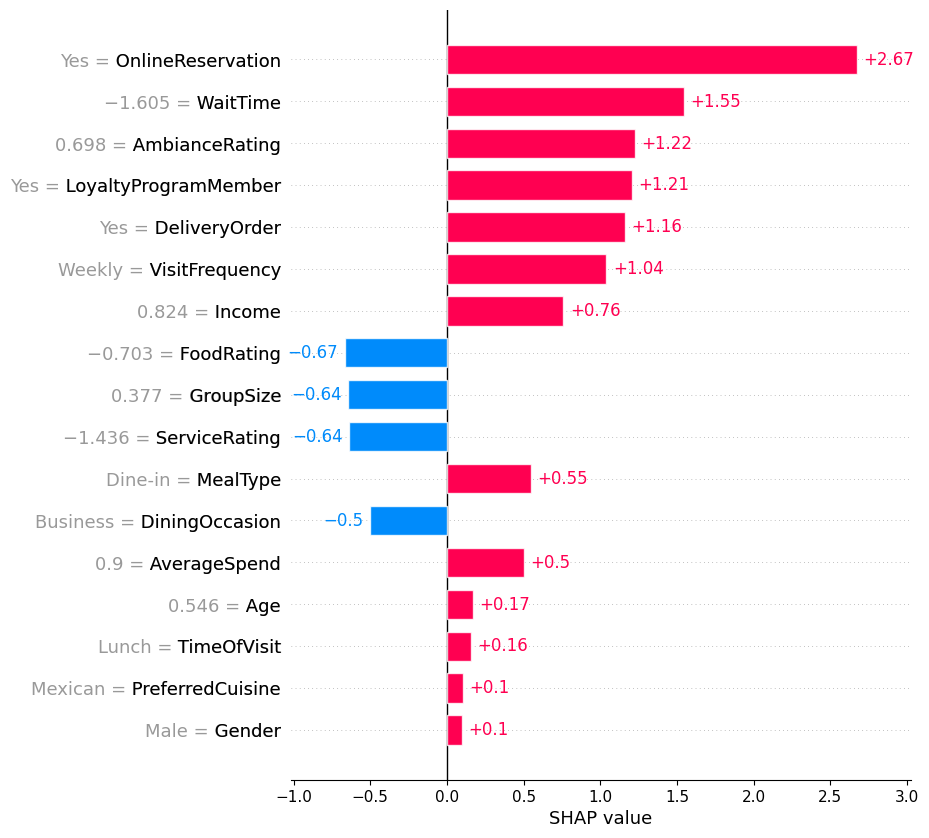

In [148]:
df_shap_values = tree_explainer(x_train_new)
shap.plots.bar(df_shap_values[0], max_display=x_train_new.shape[1])

**4.4** Построить график `shap.plots.waterfall` для одного объекта выборки

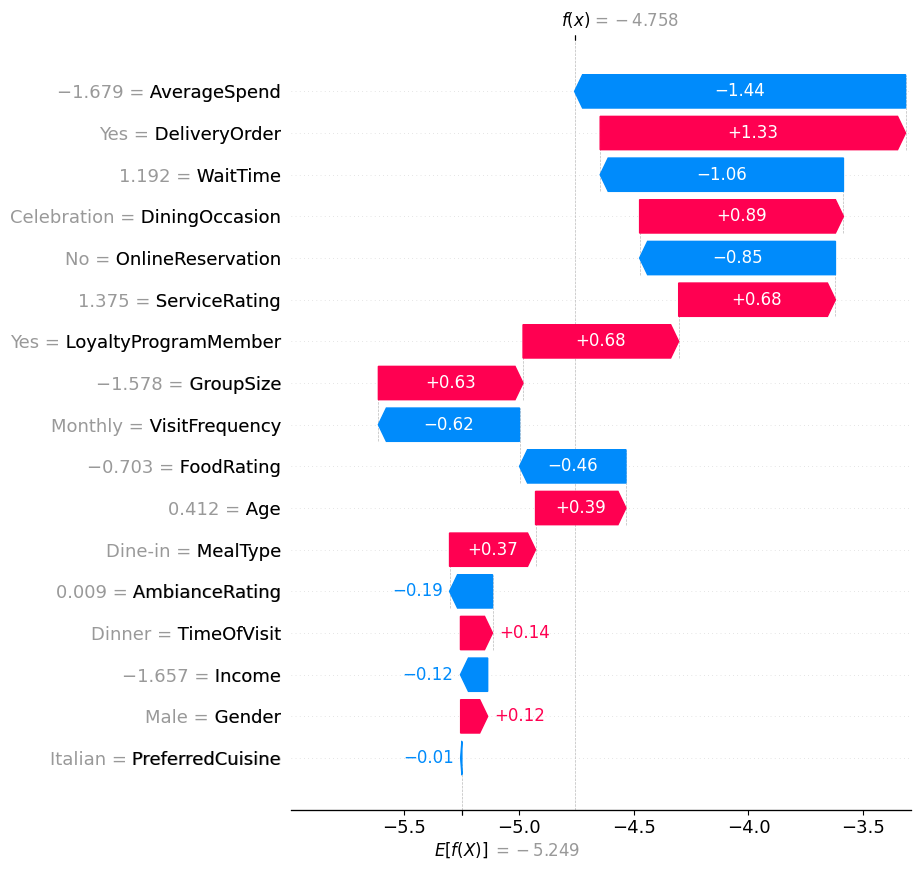

In [149]:
shap.plots.waterfall(df_shap_values[3], max_display=x_train_new.shape[1])

**4.5** Построить 2 графика `shap.plots.scatter` для какого-нибудь признака. На одном раскрасить относительно себя, на втором – относительно другого признака

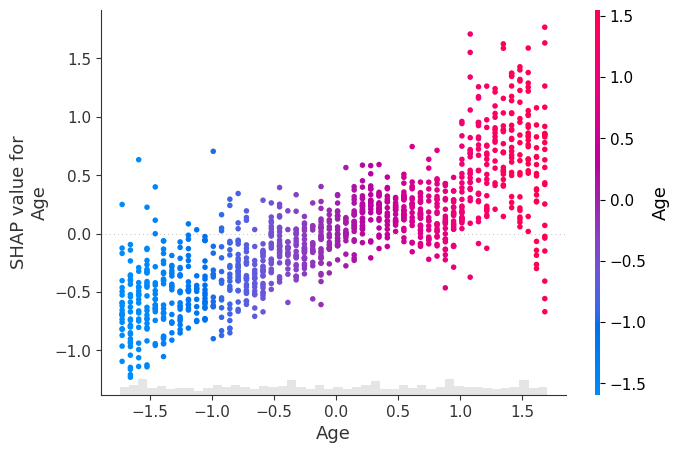

In [150]:
shap.plots.scatter(df_shap_values[:, "Age"], color=df_shap_values[:, "Age"])

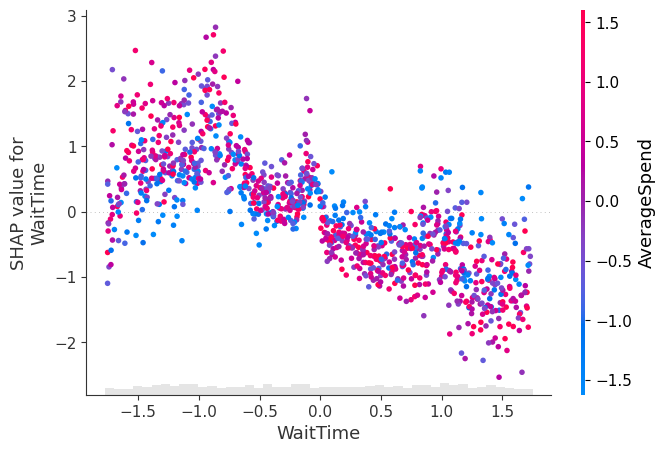

In [151]:
shap.plots.scatter(df_shap_values[:, "WaitTime"], color=df_shap_values[:, "AverageSpend"])

**4.6** Построить график `shap.plots.beeswarm` для всех признаков

<Axes: xlabel='SHAP value (impact on model output)'>

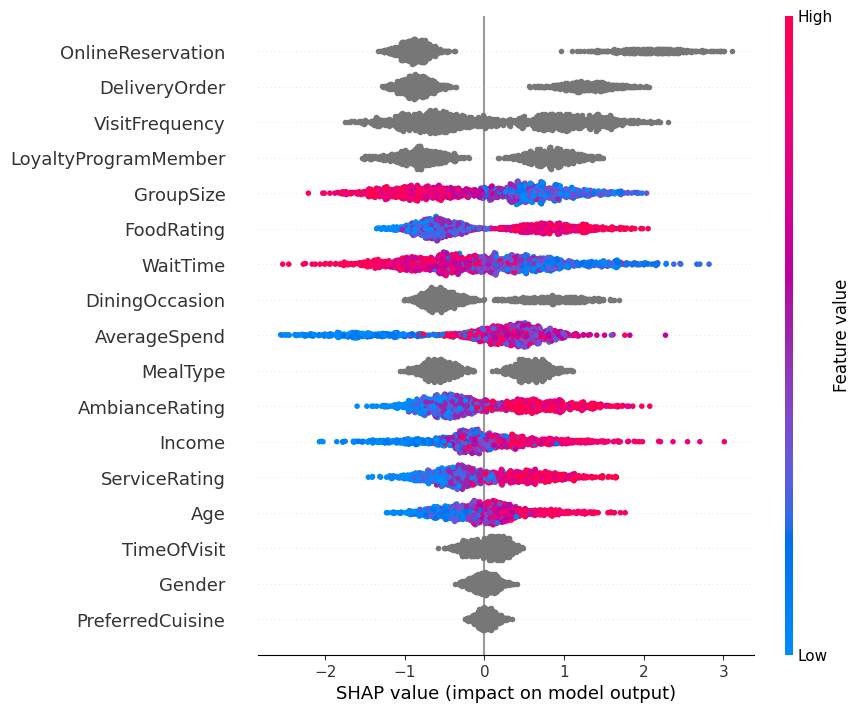

In [152]:
shap.plots.beeswarm(df_shap_values, max_display=x_train_new.shape[1], show=False)

**4.7** Построить график `shap.plots.bar` для всех признаков

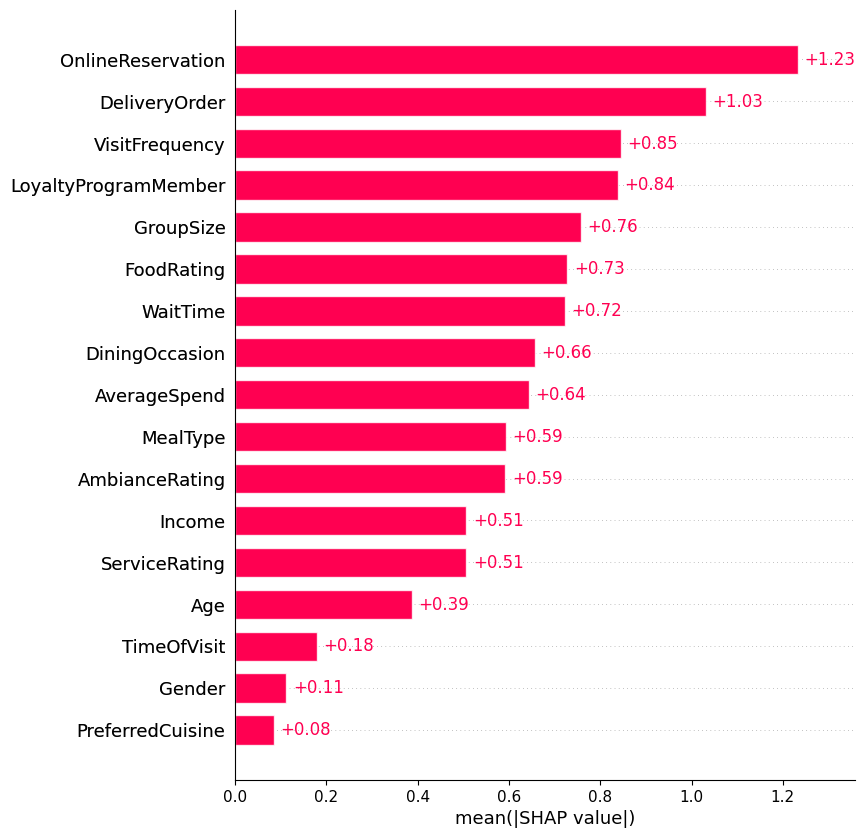

In [153]:
shap.plots.bar(df_shap_values, max_display=x_train_new.shape[1])

**4.8** На основании двух последних графиков и/или используя `feature_importance` отфильровать признаки (отразить сформулированные выводы в тексте), переобучить лучшую модель

Оставим признаки, для которых среднее значение SHAP > 0.5

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1500 non-null   float64
 1   Gender                1500 non-null   object 
 2   Income                1500 non-null   float64
 3   VisitFrequency        1500 non-null   object 
 4   AverageSpend          1500 non-null   float64
 5   PreferredCuisine      1500 non-null   object 
 6   TimeOfVisit           1500 non-null   object 
 7   GroupSize             1500 non-null   float64
 8   DiningOccasion        1500 non-null   object 
 9   MealType              1500 non-null   object 
 10  OnlineReservation     1500 non-null   object 
 11  DeliveryOrder         1500 non-null   object 
 12  LoyaltyProgramMember  1500 non-null   object 
 13  WaitTime              1500 non-null   float64
 14  ServiceRating         1500 non-null   float64
 15  FoodRating           

In [154]:
filterred_cols = ['OnlineReservation','DeliveryOrder', 'LoyaltyProgramMember', "VisitFrequency", "DiningOccasion",  "FoodRating", "GroupSize", "WaitTime", "AmbianceRating", "AverageSpend", "MealType", "ServiceRating", "Income"]

In [164]:
catboost_best.fit(x_train_new[filterred_cols], y_train, cat_features=['OnlineReservation','DeliveryOrder', 'LoyaltyProgramMember', "VisitFrequency", "DiningOccasion", "MealType"])

0:	learn: 0.5096195	total: 1.66ms	remaining: 264ms
1:	learn: 0.4222962	total: 4.02ms	remaining: 317ms
2:	learn: 0.3627474	total: 5.72ms	remaining: 299ms
3:	learn: 0.3339121	total: 7.42ms	remaining: 289ms
4:	learn: 0.3096596	total: 9.08ms	remaining: 281ms
5:	learn: 0.2936894	total: 10.7ms	remaining: 275ms
6:	learn: 0.2763341	total: 12.4ms	remaining: 270ms
7:	learn: 0.2586729	total: 14.5ms	remaining: 276ms
8:	learn: 0.2440522	total: 16.2ms	remaining: 272ms
9:	learn: 0.2322243	total: 18.1ms	remaining: 271ms
10:	learn: 0.2203303	total: 19.7ms	remaining: 267ms
11:	learn: 0.2133074	total: 22.4ms	remaining: 277ms
12:	learn: 0.2060390	total: 24ms	remaining: 272ms
13:	learn: 0.1985859	total: 25.5ms	remaining: 266ms
14:	learn: 0.1938242	total: 26.9ms	remaining: 260ms
15:	learn: 0.1845236	total: 28.6ms	remaining: 258ms
16:	learn: 0.1809263	total: 30.2ms	remaining: 254ms
17:	learn: 0.1737169	total: 31.8ms	remaining: 251ms
18:	learn: 0.1678403	total: 33.3ms	remaining: 247ms
19:	learn: 0.1625238	tot

**4.9** Сравнить метрики до и после фильтрации

In [167]:
preds = catboost_best.predict(x_test_new[filterred_cols])
print(classification_report(y_test, preds, digits=7))

              precision    recall  f1-score   support

          No  0.9000000 0.9843750 0.9402985       320
         Yes  0.8000000 0.3636364 0.5000000        55

    accuracy                      0.8933333       375
   macro avg  0.8500000 0.6740057 0.7201493       375
weighted avg  0.8853333 0.8933333 0.8757214       375



Метрики посл фильтрации немного ухудшилсь

**4.10** Визуализировать полученное дерево решений

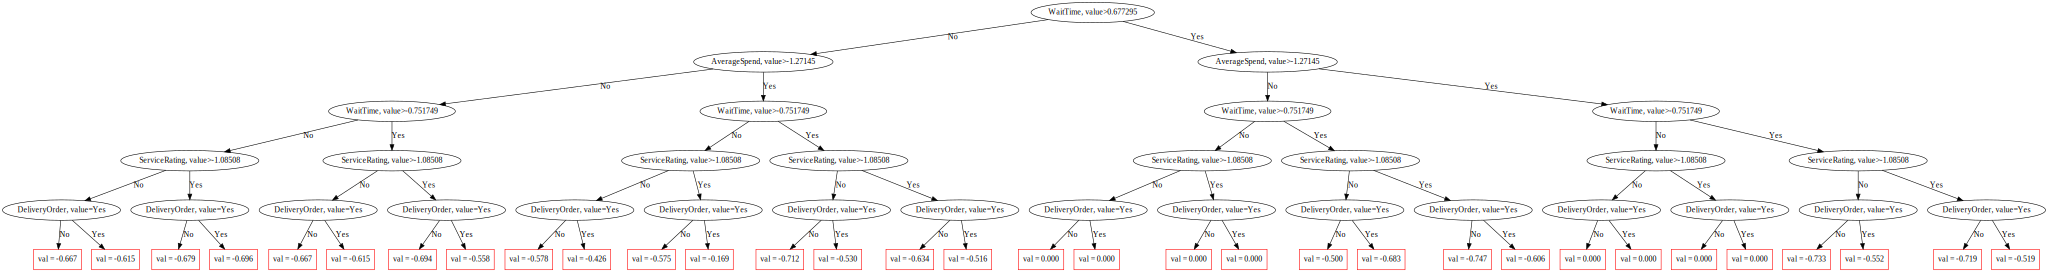

In [170]:
catboost_best.plot_tree(tree_idx=0, pool=Pool(data=x_train_new[filterred_cols], label=y_train, cat_features=['OnlineReservation','DeliveryOrder', 'LoyaltyProgramMember', "VisitFrequency", "DiningOccasion", "MealType"]))

# Регрессия

**5.1** С использованием `GridSearchCV`/`grid_search` осуществить подбор гиперпараметра модели линейной регрессии с использованием
XGBoost или CatBoost.
> xgboost.XGBRegressor в XGBoost, CatBoostRegressor в
CatBoost. В целом, можно выбрать новый таргет из уже полученного разбиения на обучающую и тестовыую выборки из пункта 2

Будем предсказывать WaitTime

In [36]:
y_train_regr = x_train_coded["WaitTime"]
x_train_regr = pd.concat([x_train_coded.drop(["WaitTime"], axis=1), y_train_coded], axis=1)

y_test_regr = x_test_coded["WaitTime"]
x_test_regr = pd.concat([x_test_coded.drop(["WaitTime"], axis=1), y_test_coded], axis=1)

In [37]:
x_train_regr.head()

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
767,-0.389783,0,-0.424856,1,-1.172274,4,0,1.549902,2,1,0,0,0,1.374628,1.411872,-0.680811,0
1162,1.481604,0,0.918727,0,-0.626273,1,2,-1.577528,2,1,1,1,1,-0.030922,1.411872,-1.370355,1
434,-0.857630,0,0.896301,2,-0.039471,4,0,-1.577528,2,0,1,1,0,-0.030922,-1.408112,-0.680811,0
1471,0.412240,0,0.770785,0,-1.176935,1,0,-0.404742,2,1,0,1,0,-1.436472,0.706876,-1.370355,0
1259,-1.124971,1,-1.080287,0,-1.329034,2,2,-0.795670,2,1,1,0,1,1.374628,1.411872,-1.370355,1


In [41]:
xgb_model = XGBRegressor()
xgb_grid = {
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.001, 0.1, 0.001],
    "n_estimators": [100, 200, 300, 500, 1000],
    'alpha': [0.1, 0.3, 0.5],
    'lambda': [0.1, 0.3, 0.5]
}
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_grid, cv=3)
xgb_grid_search.fit(x_train_regr, y_train_regr)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'alpha': [0.1, 0.3, 0.5], 'lambda': [0.1, 0.3, 0.5],
                         'learning_rate': [0.001, 0.1, 0.001],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300, 500, 1000]})

In [42]:
xgb_grid_search.best_params_

{'alpha': 0.5,
 'lambda': 0.5,
 'learning_rate': 0.001,
 'max_depth': 3,
 'n_estimators': 1000}

**5.2** Вывести метрики MSE, MAE и  R^2 на тестовом наборе

In [43]:
best_reg = xgb_grid_search.best_estimator_
preds = best_reg.predict(x_test_regr)

print(f"Средняя квадратичная ошибка (MSE): {(mean_squared_error(y_test_regr, preds)):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {(mean_absolute_error(y_test_regr, preds)):.3f}")
print(f"Коэффициент детерминации (R2 score): {(r2_score(y_test_regr, preds)):.3f}")

Средняя квадратичная ошибка (MSE): 1.007
Средняя абсолютная ошибка (MAE): 0.869
Коэффициент детерминации (R2 score): 0.019


**5.3** Переобучить модель на отфильтрованном наборе признаков из пункта 4

In [44]:
filterred_cols = ['OnlineReservation','DeliveryOrder', 'LoyaltyProgramMember', "VisitFrequency", "DiningOccasion",  "FoodRating", "GroupSize", "HighSatisfaction", "AmbianceRating", "AverageSpend", "MealType", "ServiceRating", "Income"]
best_reg.fit(x_train_regr[filterred_cols], y_train_regr)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.5, learning_rate=0.001,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

**5.4** Сравнить метрики до и после фильтрации

In [45]:
preds = best_reg.predict(x_test_regr[filterred_cols])
print(f"Средняя квадратичная ошибка (MSE): {(mean_squared_error(y_test_regr, preds)):.3f}")
print(f"Средняя абсолютная ошибка (MAE): {(mean_absolute_error(y_test_regr, preds)):.3f}")
print(f"Коэффициент детерминации (R2 score): {(r2_score(y_test_regr, preds)):.3f}")

Средняя квадратичная ошибка (MSE): 1.009
Средняя абсолютная ошибка (MAE): 0.870
Коэффициент детерминации (R2 score): 0.016


Метрики ухудшились